In [1]:
import litebird_sim as lbs
import numpy as np
from swipe_modules import scanning_strategy
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
sim = lbs.Simulation(
    start_time=0,
    duration_s=36*3600,
    description="SWIPE simulation",
)

In [3]:
sim.generate_spin2ecl_quaternions(scanning_strategy.SwipeScanningStrategy(),delta_time_s=1)

In [4]:
instr = lbs.InstrumentInfo(
    name="swipe",
    spin_boresight_angle_rad=np.deg2rad(40),
)
det = lbs.DetectorInfo(name="foo", sampling_rate_hz=10)

In [5]:
obs, = sim.create_observations(detectors=[det])
pointings = lbs.get_pointings(
    obs,
    sim.spin2ecliptic_quats,
    detector_quats=[det.quat],
    bore2spin_quat=instr.bore2spin_quat,
)

In [6]:
nside = 256
npix = hp.nside2npix(nside)
h = np.zeros(npix)
for idet in [0]:
    pixidx = hp.ang2pix(nside, pointings[idet, :, 0], pointings[idet, :, 1])
    pixel_occurrences = np.bincount(pixidx)
    h[0:len(pixel_occurrences)] += pixel_occurrences

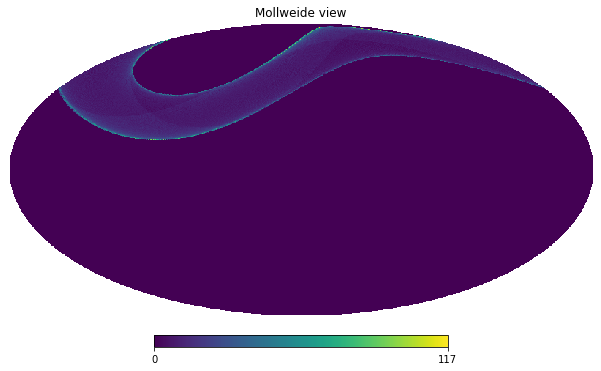

In [7]:
hp.mollview(h)